https://www.samsonzhang.com/2020/11/24/understanding-the-math-behind-neural-networks-by-building-one-from-scratch-no-tf-keras-just-numpy

In [44]:
import numpy as np
import struct
import matplotlib.pyplot as plt

def load_data():
    # with open('samples/t10k-images.idx3-ubyte','rb') as f:
    with open('samples/train-images.idx3-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, -1))
        data=data/255
    # with open('samples/t10k-labels.idx1-ubyte','rb') as f:
    with open('samples/train-labels.idx1-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        labels = labels.reshape((size,)) # (Optional)
    return labels, data, nrows, ncols

def load_validation_data():
    with open('samples/t10k-images.idx3-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, -1))
        data=data/255
    with open('samples/t10k-labels.idx1-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        labels = labels.reshape((size,)) # (Optional)
    return labels, data, nrows, ncols


In [45]:
def ReLU(Z):
    return np.maximum(Z,0)

def ReLU_dev(Z):
    return 1*(Z>0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def get_predictions(A2):
    return np.argmax(A2,axis=0)

In [46]:
def one_hot(y):
    yy=np.zeros((y.max()+1,y.size))
    yy[y,np.arange(y.size)]=1
    return yy

In [47]:
def cross_ent(y,y_hat): # true(onehotencoded), predicted
    return -np.log(y_hat.T[y.astype(bool).T])

In [48]:
def init_params():
    N_L1=100
    N_L2=10
    W1 = np.random.rand(N_L1, 784) - 0.5
    b1 = np.random.rand(N_L1, 1) - 0.5
    W2 = np.random.rand(N_L2, N_L1) - 0.5
    b2 = np.random.rand(N_L2, 1) - 0.5
    return W1, b1, W2, b2

In [49]:
# forward_prop(W1,b1,W2,b2,X):
# return Z1,A1,Z2,A2
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    N=Y.size
    one_hot_y=one_hot(Y)
    dZ2=A2-one_hot_y
    db2=np.sum(dZ2,axis=1,keepdims=True)/N
    dW2=dZ2.dot(A1.T)/N
    dZ1=W2.T.dot(dZ2)*ReLU_dev(Z1)
    db1=np.sum(dZ1,axis=1,keepdims=True)/N
    dW1=dZ1.dot(X.T)/N
    return dW1,db1,dW2,db2

In [50]:
def update_params(W1,b1, W2,b2,dW1,db1,dW2,db2,alpha):
    W1-=dW1*alpha
    b1-=db1*alpha
    W2-=dW2*alpha
    b2-=db2*alpha
    return W1, b1, W2, b2

In [51]:
def get_accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size

In [52]:
def gradient_descent(X,Y,alpha,iterations,X_v=None,Y_v=None):
    W1, b1, W2, b2 =init_params()
    debug=[]
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1,b1, W2,b2,dW1,db1,dW2,db2,alpha)
    
        if i%10==0 or i==iterations-1:
            predictions=get_predictions(A2)
            acc=get_accuracy(predictions,Y)
            acc_v=0
            if X_v is not None and Y_v is not None:
                _,_,_,A2_v = forward_prop(W1,b1,W2,b2,X_v)
                predictions_v=get_predictions(A2_v)
                acc_v=get_accuracy(predictions_v,Y_v)
            debug.append((i,acc,acc_v))
            print(f"Iteration: {i}\t\tAccuracy: {acc:.4f} \t\tAccuracy_v: {acc_v:.4f}")

    return W1,b1,W2,b2,debug

In [53]:
labels_train, data_train, nrows,ncols =load_data()
data_train=data_train.T
labels_validation, data_validation, _,_ =load_validation_data()
data_validation=data_validation.T
W1,b1,W2,b2,debug=gradient_descent(data_train,labels_train,0.5,500,data_validation,labels_validation)

Iteration: 0		Accuracy: 0.1183 		Accuracy_v: 0.1765
Iteration: 10		Accuracy: 0.6897 		Accuracy_v: 0.7171
Iteration: 20		Accuracy: 0.7823 		Accuracy_v: 0.7949
Iteration: 30		Accuracy: 0.8227 		Accuracy_v: 0.8320
Iteration: 40		Accuracy: 0.8449 		Accuracy_v: 0.8527
Iteration: 50		Accuracy: 0.8599 		Accuracy_v: 0.8663
Iteration: 60		Accuracy: 0.8695 		Accuracy_v: 0.8755
Iteration: 70		Accuracy: 0.8774 		Accuracy_v: 0.8826
Iteration: 80		Accuracy: 0.8836 		Accuracy_v: 0.8888
Iteration: 90		Accuracy: 0.8893 		Accuracy_v: 0.8941
Iteration: 100		Accuracy: 0.8940 		Accuracy_v: 0.8972
Iteration: 110		Accuracy: 0.8978 		Accuracy_v: 0.9012
Iteration: 120		Accuracy: 0.9010 		Accuracy_v: 0.9034
Iteration: 130		Accuracy: 0.9044 		Accuracy_v: 0.9072
Iteration: 140		Accuracy: 0.9074 		Accuracy_v: 0.9089
Iteration: 150		Accuracy: 0.9101 		Accuracy_v: 0.9107
Iteration: 160		Accuracy: 0.9126 		Accuracy_v: 0.9123
Iteration: 170		Accuracy: 0.9146 		Accuracy_v: 0.9140
Iteration: 180		Accuracy: 0.9168 		Accu

Final accuracy (Using training data):	 0.9467
Final accuracy (Using validation data):	 0.9426


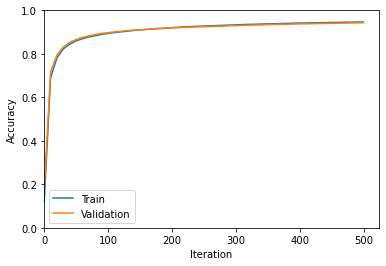

In [54]:
x,y1,y2=zip(*debug)
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
ax = plt.gca()
ax.set_xlim([0, None])
ax.set_ylim([0, 1])
print("Final accuracy (Using training data):\t",y1[-1])
print("Final accuracy (Using validation data):\t",y2[-1])
ax.legend(["Train","Validation"])
plt.show()

# Accuracy checks with training data

In [55]:
_,_,_,A2=forward_prop(W1,b1,W2,b2,data_train)
predictions_train=get_predictions(A2)
acc=get_accuracy(predictions_train,labels_train)

correct=labels_train==predictions_train

print("Accuracy: ",acc)
print("Mislabeled: ", np.sum(~correct))
print("ID\tLabel\tPrediction\tError")
for i,(lab,pred,right) in enumerate(zip(*(labels_train,predictions_train,correct))):
    if not right:
        print(f"{i}\t{lab}\t\t{pred}\t {'x' if not right else ''}")
        pass


Accuracy:  0.9467666666666666
Mislabeled:  3194
ID	Label	Prediction	Error
24	1		5	 x
48	9		5	 x
80	9		0	 x
132	5		1	 x
134	1		4	 x
148	7		9	 x
172	9		7	 x
178	2		0	 x
224	1		8	 x
240	8		1	 x
268	2		7	 x
278	5		3	 x
304	9		7	 x
391	2		3	 x
414	4		2	 x
418	8		5	 x
470	1		5	 x
494	6		0	 x
500	3		7	 x
544	5		3	 x
547	6		4	 x
584	2		6	 x
602	8		3	 x
626	9		7	 x
635	5		2	 x
644	7		1	 x
665	6		8	 x
670	3		2	 x
718	4		9	 x
720	8		1	 x
736	8		3	 x
740	8		5	 x
770	6		7	 x
778	5		4	 x
782	9		7	 x
784	8		3	 x
788	9		4	 x
828	4		6	 x
850	4		6	 x
854	2		9	 x
864	9		7	 x
892	6		8	 x
902	9		0	 x
933	7		4	 x
966	3		5	 x
995	7		4	 x
1019	7		0	 x
1021	3		5	 x
1029	0		5	 x
1030	4		2	 x
1032	5		3	 x
1050	4		2	 x
1053	2		8	 x
1075	7		4	 x
1079	4		1	 x
1088	7		3	 x
1097	3		2	 x
1111	5		2	 x
1116	9		4	 x
1119	3		5	 x
1120	8		2	 x
1127	7		0	 x
1137	0		8	 x
1138	9		7	 x
1148	1		4	 x
1151	3		5	 x
1201	3		8	 x
1222	5		3	 x
1244	3		9	 x
1259	1		8	 x
1260	3		9	 x
1263	5		8	 x
1270	2		1	 x
1282	9		3	 x
1287	1		8	 x


Label: 9	Prediction: 7


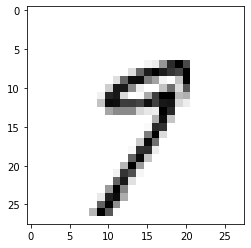

In [63]:
n=59942	
plt.imshow(data_train[:,n].reshape(nrows,ncols), cmap='gray_r')
print(f"Label: {labels_train[n]}\tPrediction: {predictions_train[n]}")
plt.show()

# Accuracy checks with validation data

In [57]:
_,_,_,A2=forward_prop(W1,b1,W2,b2,data_validation)
predictions_validation=get_predictions(A2)
acc=get_accuracy(predictions_validation,labels_validation)

correct=labels_validation==predictions_validation

print("Accuracy: ",acc)
print("Mislabeled: ", np.sum(~correct))
print("ID\tLabel\tPrediction\tError")
for i,(lab,pred,right) in enumerate(zip(*(labels_validation,predictions_validation,correct))):
    if not right:
        print(f"{i}\t{lab}\t\t{pred}\t {'x' if not right else ''}")
        pass


Accuracy:  0.9426
Mislabeled:  574
ID	Label	Prediction	Error
8	5		9	 x
33	4		6	 x
63	3		2	 x
84	8		5	 x
142	3		2	 x
149	2		6	 x
172	2		3	 x
195	3		2	 x
245	3		5	 x
247	4		2	 x
259	6		0	 x
290	8		4	 x
300	4		6	 x
313	3		5	 x
320	9		1	 x
321	2		7	 x
340	5		3	 x
359	9		4	 x
381	3		7	 x
412	5		3	 x
433	5		4	 x
443	0		5	 x
445	6		0	 x
478	5		8	 x
502	5		3	 x
507	3		5	 x
511	4		8	 x
530	9		4	 x
531	3		2	 x
543	8		4	 x
551	7		1	 x
565	4		9	 x
571	4		9	 x
578	3		8	 x
582	8		3	 x
591	8		3	 x
610	4		6	 x
629	2		6	 x
658	7		0	 x
659	2		9	 x
667	7		1	 x
684	7		3	 x
691	8		4	 x
707	4		9	 x
717	0		5	 x
720	5		8	 x
740	4		9	 x
771	7		9	 x
795	3		2	 x
810	7		3	 x
830	2		4	 x
839	8		3	 x
844	8		5	 x
857	5		3	 x
881	4		9	 x
882	9		7	 x
890	3		5	 x
916	4		7	 x
947	8		9	 x
951	5		4	 x
956	1		2	 x
959	4		9	 x
965	6		0	 x
990	2		3	 x
1014	6		5	 x
1039	7		9	 x
1050	2		5	 x
1055	7		9	 x
1062	3		7	 x
1073	5		8	 x
1107	9		8	 x
1112	4		6	 x
1114	3		8	 x
1119	7		2	 x
1138	2		6	 x
1181	6		1	 x
1191	0		6	 x
1192	9	

Label: 8	Prediction: 4


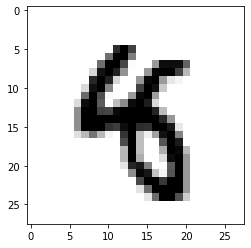

In [65]:
n=290
plt.imshow(data_validation[:,n].reshape(nrows,ncols), cmap='gray_r')
print(f"Label: {labels_validation[n]}\tPrediction: {predictions_validation[n]}")
plt.show()